<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [5]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [22]:
df.head(155)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
150,Yemen,151,85,153.0,75.0,100.0,147.0,83.0,155.0,141.0,124.0
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0


In [33]:
# сразу почистим данные от неопределенных значений
df = df.dropna()

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

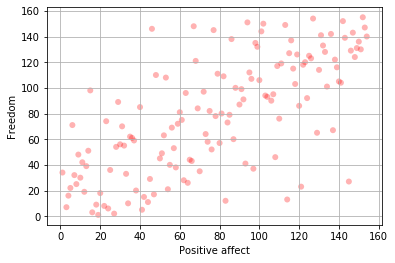

In [34]:
positive_affect = df['Positive affect']
freedom = df['Freedom']
fig, ax = plt.subplots()
ax.scatter(positive_affect, freedom, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.show()

# равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [35]:
df['Freedom'].median()

79.5

In [36]:
sts.mode(df['Positive affect'])

ModeResult(mode=array([1.]), count=array([1]))

Почему нельзя найти моду?

* распределение равномерное, моды нет

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

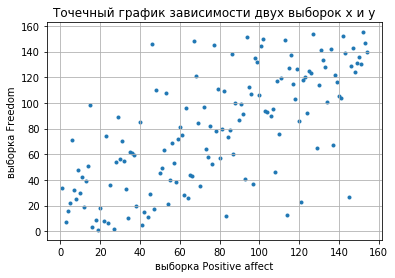

In [37]:
positive_affect = df['Positive affect']
freedom = df['Freedom']
plt.xlabel('выборка Positive affect')
plt.ylabel('выборка Freedom')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(positive_affect, freedom, marker='.')

# видно, что есть небольшая корелляция

In [41]:
# проверим это
x = df['Positive affect']
y = df['Freedom']
corr, p_value = sts.pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

# знак коэффициента говорит о том, что зависимость прямая (увеличение одной прееменной ведет к увеличению другой)

Коэффициент корреляции Пирсона: 0.696567045809068


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [42]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_n = min_max_scaler.fit_transform(np.array(freedom).reshape(-1, 1))
print(min(freedom_n), max(freedom_n))

[-1.] [1.]


Построить матрицу корреляций для всех колонок таблицы

In [43]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


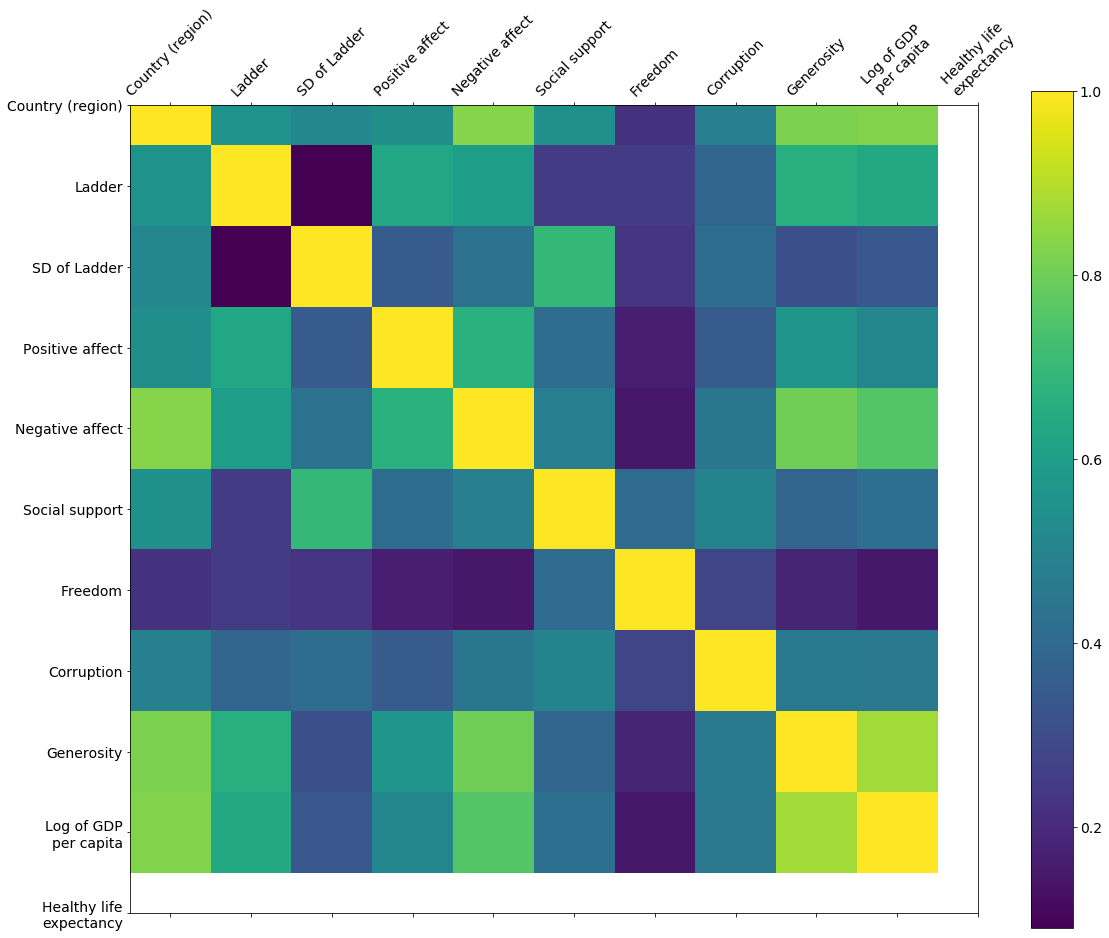

In [44]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Загрузить таблицу цен на авокадо: 

In [45]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

HTTPError: HTTP Error 404: Not Found

Сделать частотный график колонки AveragePrice. Какое это распределение?

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?